### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# check the version of matplot
matplotlib.__version__

'3.7.0'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

### Importing Dataframe

In [4]:
path = r'C:\Users\User\Documents\Medical cost personal'

In [5]:
df =  pd.read_pickle(r'C:\Users\User\Documents\Medical cost personal\Prepared Data\df_clean.pkl')

### Exploring the data

In [6]:
df.shape

(1337, 8)

In [7]:
df.columns

Index(['Age', 'sex', 'BMI', 'children', 'smoker', 'region', 'charges',
       'Price category'],
      dtype='object')

In [8]:
df.head()

,Age,sex,BMI,children,smoker,region,charges,Price category
0,19,female,27.900,0,yes,southwest,16884.92400,High price
1,18,male,33.770,1,no,southeast,1725.55230,High price
2,28,male,33.000,3,no,southeast,4449.46200,High price
3,33,male,22.705,0,no,northwest,21984.47061,High price
4,32,male,28.880,0,no,northwest,3866.85520,High price


In [9]:
# Check for missing values
df.isnull().sum()

Age               0
sex               0
BMI               0
children          0
smoker            0
region            0
charges           0
Price category    0
dtype: int64

In [10]:
df_dups = df.duplicated()

In [11]:
df_dups.shape

(1337,)

### Extreme Value Checks

<Axes: xlabel='charges', ylabel='Count'>

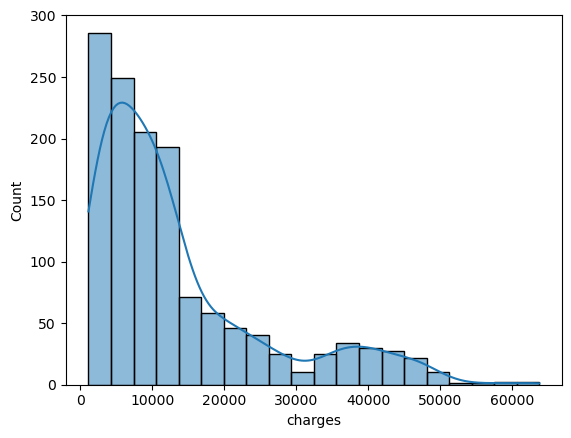

In [14]:
# show extreme 'charges'
sns.histplot(df['charges'], bins=20, kde = True)

<Axes: xlabel='BMI', ylabel='Count'>

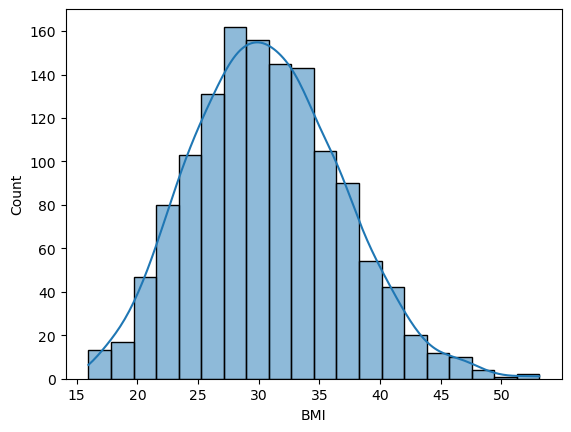

In [15]:
# show extreme 'BMI'
sns.histplot(df['BMI'], bins=20, kde = True)

<Axes: xlabel='Age', ylabel='Count'>

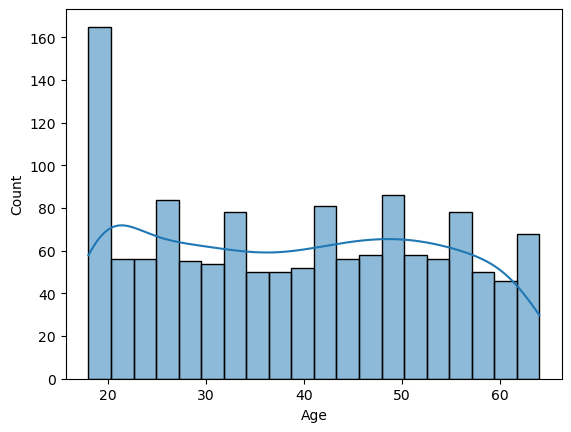

In [16]:
# show extreme 'Age'
sns.histplot(df['Age'], bins=20, kde = True)

<Axes: xlabel='sex', ylabel='Count'>

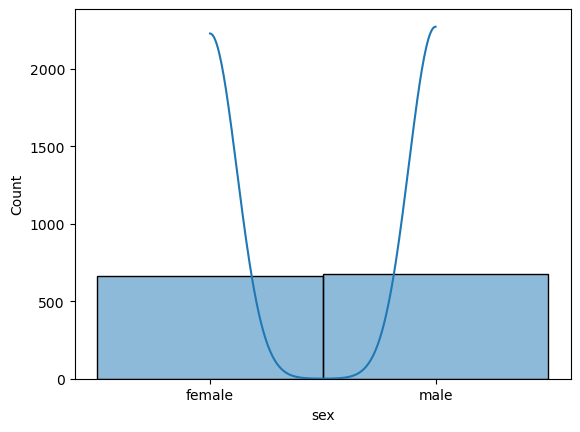

In [6]:
# show extreme 'sex'
sns.histplot(df['sex'], bins=20, kde = True)

#### Hypothesis

1.There is a significant correlation between age and medical expenses.

2.There is a significant correlation between BMI and medical charges.

## Data prep for regression analysis

In [18]:
# There is a significant correlation between age and medical expenses.

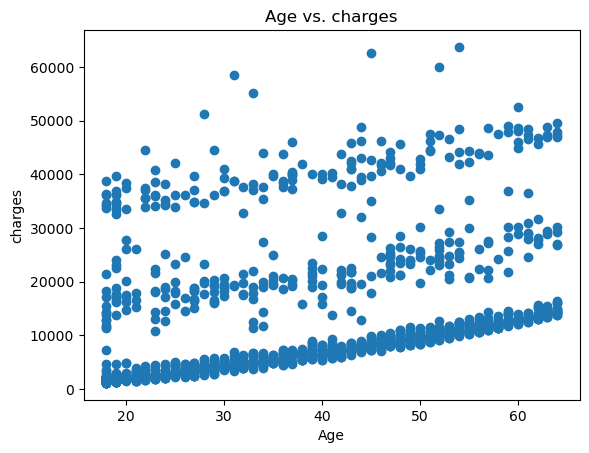

In [24]:
# Scatterplot for Age and Charges variables plot against each other.
plt.scatter(x=df['Age'], y=df['charges'])
plt.title('Age vs. charges')
plt.xlabel('Age')
plt.ylabel('charges')
plt.show()

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Age'].values.reshape(-1,1)
y = df['charges'].values.reshape(-1,1)

In [26]:
X

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [27]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [28]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
# Regression Analysis

In [30]:
# Create a regression object.
# Regression object, which will be fit onto the training set
regression = LinearRegression()

In [31]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

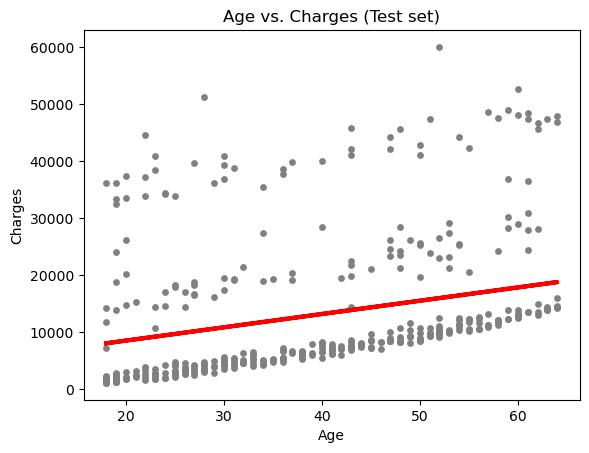

In [33]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs. Charges (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Charges')
plot_test.show()

In [34]:
# Create objects that contain the model summary statistics.
# This is the mean squared error
rmse = mean_squared_error(y_test, y_predicted) 
# This is the R2 score.
r2 = r2_score(y_test, y_predicted)

In [35]:
# Print the model summary statistics. 
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  146173303.34737504
R2 score:  0.10739068301367438


In [36]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1633.96180,8086.242979
1,8547.69130,14843.935802
2,9290.13950,15309.983583
3,32548.34050,8319.266870
4,9644.25250,15776.031364
5,2680.94930,9950.434103
6,2198.18985,8086.242979
7,1241.56500,8319.266870
8,2710.82855,8319.266870
9,12235.83920,17407.198597


In [37]:
# Compare how the regression fits the training set

In [38]:
# Predict.
# This is predicting X_train!
y_predicted_train = regression.predict(X_train)

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  128318059.75747488
R2 score:  0.07682646420531714


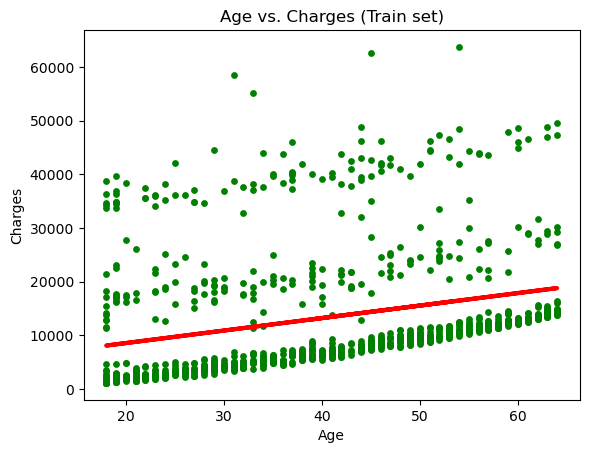

In [41]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs. Charges (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Charges')
plot_test.show()

In [17]:
# Model Modification

In [18]:
# New dataset for over 50 'Age'

In [48]:
# Model Modification based on people 50 years and above
df_new = df[df['Age']>=55]

In [49]:
df_new.shape

(242, 8)

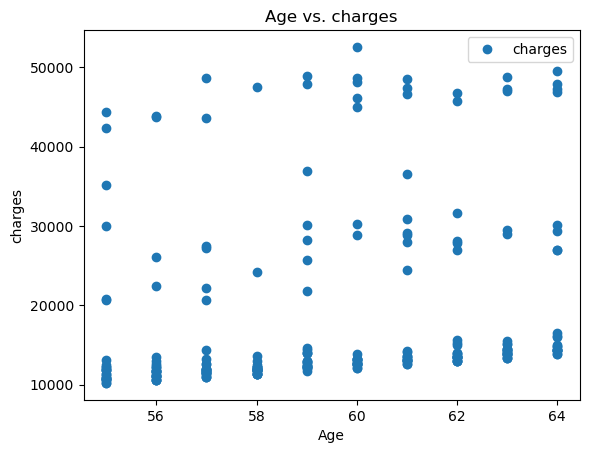

In [67]:
# Scatterplot to investigate how Age and Charges variables plot against each other.
df_new.plot(x = 'Age', y='charges',style='o')
plt.title('Age vs. charges')
plt.xlabel('Age')
plt.ylabel('charges')
plt.show()

In [51]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_new['Age'].values.reshape(-1,1)
y = df_new['charges'].values.reshape(-1,1)

In [52]:
X

array([[60],
       [62],
       [56],
       [56],
       [60],
       [59],
       [63],
       [55],
       [63],
       [62],
       [60],
       [55],
       [60],
       [58],
       [58],
       [64],
       [61],
       [58],
       [57],
       [57],
       [56],
       [55],
       [59],
       [64],
       [55],
       [56],
       [61],
       [63],
       [55],
       [60],
       [58],
       [59],
       [61],
       [63],
       [63],
       [58],
       [61],
       [56],
       [64],
       [60],
       [59],
       [63],
       [55],
       [58],
       [59],
       [59],
       [55],
       [63],
       [60],
       [63],
       [55],
       [56],
       [58],
       [59],
       [59],
       [55],
       [63],
       [59],
       [56],
       [57],
       [58],
       [57],
       [64],
       [61],
       [61],
       [56],
       [64],
       [60],
       [62],
       [62],
       [60],
       [63],
       [57],
       [56],
       [61],
       [57],
       [64],

In [53]:
y

array([[28923.13692],
       [27808.7251 ],
       [11090.7178 ],
       [10602.385  ],
       [13228.84695],
       [14001.1338 ],
       [14451.83515],
       [12268.63225],
       [13770.0979 ],
       [15612.19335],
       [48173.361  ],
       [20630.28351],
       [12629.8967 ],
       [47496.49445],
       [13607.36875],
       [30166.61817],
       [14235.072  ],
       [11946.6259 ],
       [11356.6609 ],
       [43578.9394 ],
       [11073.176  ],
       [11082.5772 ],
       [30184.9367 ],
       [47291.055  ],
       [10226.2842 ],
       [22412.6485 ],
       [30942.1918 ],
       [47055.5321 ],
       [11881.358  ],
       [30259.99556],
       [11381.3254 ],
       [12815.44495],
       [13616.3586 ],
       [13405.3903 ],
       [48824.45   ],
       [11735.87905],
       [12557.6053 ],
       [12044.342  ],
       [14901.5167 ],
       [13012.20865],
       [11743.299  ],
       [13880.949  ],
       [11987.1682 ],
       [24227.33724],
       [14001.2867 ],
       [12

In [54]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
# Regression Analysis

In [55]:
# Create a regression object.
# Regression object, which will be fit onto the training set.
regression = LinearRegression()  

In [56]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [57]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

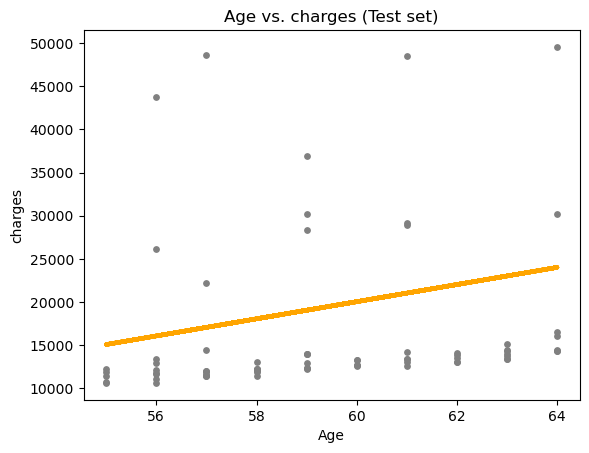

In [58]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('Age vs. charges (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('charges')
plot_test.show()

In [59]:
# Create objects that contain the model summary statistics.
# This is the mean squared error
rmse = mean_squared_error(y_test, y_predicted) 
# This is the R2 score. 
r2 = r2_score(y_test, y_predicted)

In [60]:
# Print the model summary statistics.
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[993.74320086]]
Mean squared error:  92962884.14712472
R2 score:  -0.10089459092188013


In [61]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,14043.47670,22014.351500
1,11842.62375,17045.635495
2,12044.34200,16051.892294
3,12029.28670,17045.635495
4,48675.51770,17045.635495
5,13981.85035,23008.094700
6,11070.53500,16051.892294
7,13430.26500,16051.892294
8,13457.96080,22014.351500
9,11394.06555,15058.149094


In [47]:
# Compare how the regression fits the training set

In [62]:
# Predict.
# This is predicting X_train!
y_predicted_train = regression.predict(X_train) 

In [63]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [64]:
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[993.74320086]]
Mean squared error:  136609070.3781498
R2 score:  0.0573922719368396


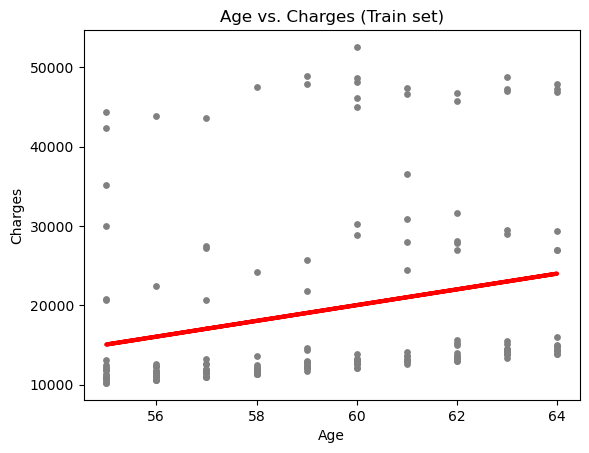

In [65]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs. Charges (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Charges')
plot_test.show()

The relationship between 'age' and 'charges' has weakened, with a reduced correlation. The linear regression model's performance is subpar, with data points scattered around the trend line. The low R2 score of 0.10 and higher mean squared error confirm the model's inadequate fit. Age alone is not a strong determinant of individual medical charges, with only a slight average decrease with increasing age. Further factors beyond age are likely influencing medical expenses, and a more sophisticated approach or consideration of other variables is necessary to gain a deeper understanding of charge determinants.

In [42]:
# There is a significant correlation between BMI and medical charges

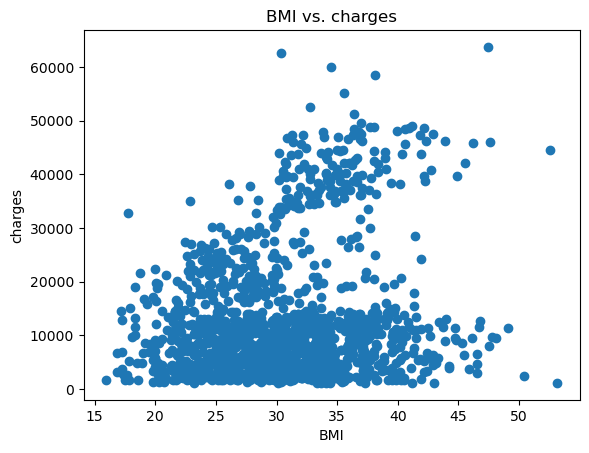

In [43]:
# Scatterplot for BMI and Charges variables plot against each other.
plt.scatter(x=df['BMI'], y=df['charges'])
plt.title('BMI vs. charges')
plt.xlabel('BMI')
plt.ylabel('charges')
plt.show()

In [45]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['BMI'].values.reshape(-1,1)
y = df['charges'].values.reshape(-1,1)

In [46]:
X

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [47]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [48]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
# Regression Analysis

In [50]:
# Create a regression object.
# Regression object, which will be fit onto the training set.
regression = LinearRegression()  

In [51]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

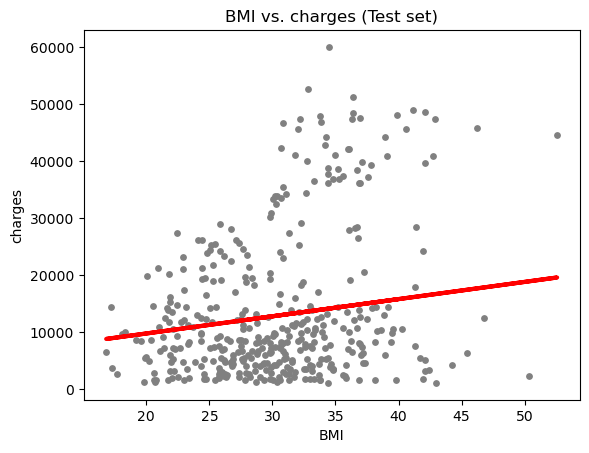

In [53]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('BMI vs. charges (Test set)')
plot_test.xlabel('BMI')
plot_test.ylabel('charges')
plot_test.show()

In [54]:
# Create objects that contain the model summary statistics.
# This is the mean squared error
rmse = mean_squared_error(y_test, y_predicted) 
 # This is the R2 score.
r2 = r2_score(y_test, y_predicted)

In [55]:
# Print the model summary statistics.
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[301.18863244]]
Mean squared error:  154131658.7511644
R2 score:  0.05879287466812988


In [56]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1633.96180,15772.620396
1,8547.69130,12625.199187
2,9290.13950,13221.552680
3,32548.34050,12890.245184
4,9644.25250,9215.743868
5,2680.94930,9101.292188
6,2198.18985,11705.067915
7,1241.56500,9742.823975
8,2710.82855,11533.390395
9,12235.83920,14766.650364


In [58]:
# Compare how the regression fits the training set

In [59]:
# Predict.
# This is predicting X_train!
y_predicted_train = regression.predict(X_train)

In [61]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [62]:
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[301.18863244]]
Mean squared error:  135599557.42526153
R2 score:  0.02444033897433817


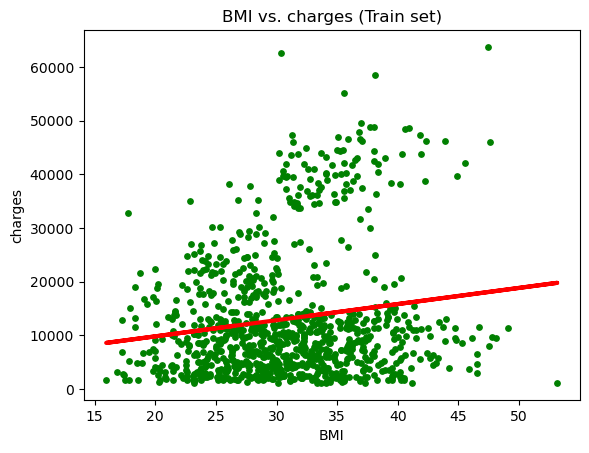

In [63]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('BMI vs. charges (Train set)')
plot_test.xlabel('BMI')
plot_test.ylabel('charges')
plot_test.show()

Based on these findings, it is difficult to conclusively claim that higher BMI levels cause higher medical expenses per person. The high MSE and low R2 square indicate that the model performs poorly and that the predictions are unreliable. It is clear that the model cannot be used in this situation, hence additional adjustments or creative solutions are needed to create a more useful model.

#### Conclusion

We can't say with certainty that a person's age or body mass index (BMI) by themselves will determine their expenses. Given that there is a dearth of data on elderly people, we most certainly need a larger dataset to draw more accurate conclusions.
When determining the total insurance costs for each person, a number of additional potential considerations should be considered. Beyond age and BMI, the complexity of insurance pricing may take into account a number of other variables and concerns, therefore more research is required to identify the full range of important elements.